# Project 1 - Closing Price Stock Regressor - Version 1.0

    Introduction

This Jupyter notebook attempts (keyword, attempts) to predict the daily closing price of an inputted stock ticker, given its historical data, some added features through feature engineering, and the current day's opening price. I am going to do my best to explain each detail so that anyone (newbie or professional) can follow along. This model as it stands right now is not very good at predicting the closing price, but that isn't really my intent with this project, but more just to display what I've learned so far, and for others to get started as well if they're interested in a skeleton project to get started. There's always room for improvement but I'm hoping that this will help get someone started on their way if they are looking to get into the field of machine learning.

Day traders typically start their mornings by creating a 'watchlist' of stocks before the market's opening bell. The theory behind this project is that, if you know (roughly) where a stock is about to open today pre-market, and have some of its previous days historical data, you might be able to train a regression model to gauge a better idea of where the stock will close that day, giving actionable insight into whether to buy the stock or not.

This project is only meant to act as a demonstration of some of my Python programming and machine learning knowledge to date (August, 2019 as of this writing). Everything I've compiled in this project I have pieced together from various sources and it's all things that I have learned from my own research and self-teaching. I have many years of technical analysis knowledge of the stock and Forex markets, but I do not have a degree in Computer Science or any formal education in the field (which may or may not become evident to whomever is reading this). I welcome advice and criticisms to make things more efficient and better so that I can develop as a programmer. If you see anything I've missed the point on, please let me know. I have spent a fair amount of time commenting each section of code to make it easy for a newbie coder to read along and understand what's happening. Experienced coders will be able to just look at each code section and see what's going on, so skim or read, the choice is yours. This should also help to isolate a section in case someone runs into an issue, they will be able to point to where it happened. 

    DISCLAIMER: This project is merely a compilation of various Python and machine learning skills that I have picked up 
    over the past few months and years, and acting as a test for me to see if I'm able to CLEARLY explain the various 
    details and tools used throughout the project so that maybe one day I can show a potential employer my skillset and 
    secure a job in this field. This tool is not actually meant to be used for stock advisement, it is for academic
    and future development purposes only.
    
    You've been warned. Now enjoy!

### The Environment and Installing the Dependencies

First thing's first, if you want to run this project, you need to have the appropriate dependencies installed. Everything listed below are the versions of each dependency as of this writing. I'll explain how to install them all at the bottom of the list. Now I can't speak for other versions, but you need to be running ... Python 3.6 on Windows 10 ..., as that's what I'm running on my machine. Here are the dependencies you'll need:

    DateTime==4.3
    pandas==0.23.0
    pandas-datareader==0.7.0
    seaborn==0.8.1
    matplotlib==2.1.2
    numpy==1.14.5
    bs4==0.0.1
    requests==2.22.0
    feature-selector==1.0.0
    featuretools==0.9.1
    dask==2.2.0
    dask-ml==1.0.0
    sklearn==0.0
    TPOT==0.10.2
    ta-lib==0.4.18

Again, this is all in Python 3.6 and Windows 10. All of the other modules used in this project (like "os" and "warnings" should be included in your Python package already. If you run into something I've missed, let me know, but this should be a complete list. There are two ways to install all of these packages:


1. Install them all at once using the Pip installer by typing the following command into your command prompt:

        pip install DateTime==4.3 pandas==0.23.0 pandas-datareader==0.7.0 seaborn==0.8.1 matplotlib==2.1.2 numpy==1.14.5 bs4==0.0.1 requests==2.22.0 feature-selector==1.0.0 featuretools==0.9.1 dask==2.2.0 dask-ml==1.0.0 sklearn TPOT==0.10.2 TA-Lib
    
   Or
            
        pip3 install DateTime==4.3 pandas==0.23.0 pandas-datareader==0.7.0 seaborn==0.8.1 matplotlib==2.1.2 numpy==1.14.5 bs4==0.0.1 requests==2.22.0 feature-selector==1.0.0 featuretools==0.9.1 dask==2.2.0 dask-ml==1.0.0 sklearn TPOT==0.10.2 TA-Lib

(Depending on how you have installed your Pip installer. Notice the 3 after pip)


2. Install them all from the provided "requirements.txt" file by typing in the following command into your command prompt:

        pip install -r requirements.txt
        
   Or
           
        pip3 install -r requirements.txt

(One of those two ways should create the environment needed to run this project. Otherwise each module will need to be installed manually as needed).

### References and Resources Before We Get Started

Before I forget and start going down the code wormhole, I wanted to take some time and reference some various websites, other's projects and the tools that I'm using in the following code. I want to thank everyone involved in my learning process and I urge you to check them out:

1. The motivation and skeleton for my project - https://gogul09.github.io/software/regression-example-boston-housing-prices
(That article taught me more in one reading than any other)


1. TPOT (automated machine learning) - https://epistasislab.github.io/tpot/
2. FeatureTools (feature engineering) - https://www.featuretools.com/
3. Feature-Selector (take a guess :D) - https://github.com/WillKoehrsen/feature-selector
4. Dask (parallel computing) - https://docs.dask.org/en/latest/
5. TA-Lib (technical indicators) - https://mrjbq7.github.io/ta-lib/index.html


1. Medium (Great resource for learning. Sign up for emails based on what you read!) - https://medium.com/topic/artificial-intelligence
2. Towards Data Science (Another awesome resource) - https://towardsdatascience.com/
3. Machine Learning Mastery (see above) - https://machinelearningmastery.com/
4. Stack Overflow (duh!) - https://stackoverflow.com/
5. Upwork (in a real pinch, pay someone to teach you something) - www.upwork.com
6. Udemy (I received great value from this course) - https://www.udemy.com/the-data-science-course-complete-data-science-bootcamp/


Without further adu, let's get started.

### The Code

Keep in mind, I have already run every cell in this notebook. If you want to re-run it, you are more than welcome to, however I have made references to values and numbers pertaining to this run only, like prices and MSE values and such. My breakdowns of each step will then vary if you're looking up a different stock, so just keep that in mind if you're re-running it for the first time. Adjust as you need.

ALSO, if you do want to start this script over again, make sure you click "Kernel > Restart and Clear Output" to make sure you're starting fresh!!!

# 1. GET THE STOCK'S HISTORICAL DATA

In [1]:
# In-notebook plotting. Take this out if running from a .py file
%matplotlib inline

# Display Future Warnings that repeat "needlessly" only once (for now)
import warnings
warnings.filterwarnings("once")

# Let's begin. Ask for which stock ticker you want to predict.
# A list of stocks that are able to be run so far are:

# CLVS
# RKDA
# AAPL
# AMZN

# ...so start with one of them. More on this later. I used CLVS for this
# notebook. A smaller cap stock with no long bias over its history.
ticker_input = input('Which stock ticker would you like to predict? ') 
print('Getting the historical data for: ',ticker_input)

Which stock ticker would you like to predict? CLVS
Getting the historical data for:  CLVS


In [2]:
# Import first group of dependencies, and then
# download the historical daily data from Yahoo Finance
# using Pandas Datareader. A different source could be
# used as I've read that getting historical data using
# this method is temperamental (and deprecated), but works for now
from datetime import datetime
from pandas_datareader import data as web
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
import seaborn as sns
import matplotlib.pyplot as plt
import random
import os
import numpy as np
import time

# Downloading historical data as a Pandas dataframe.
# Think of a dataframe as an Excel file, with rows
# and columns of data, sometimes with a header row.
ex = 'yahoo'
start = datetime(2000, 1, 1) # Edit this to whatever you want, but the older the better
end = datetime.now() # Today
dataset = web.DataReader(ticker_input, ex, start, end)

# Now let's look at the top 5 rows of the dataset
print(dataset.head(5))

print('Done!')

C:\Users\windowshopr\AppData\Local\Programs\Python\Python36\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


            High   Low  Open  Close   Volume  Adj Close
Date                                                   
2011-11-16 13.39 12.29 13.05  12.56  1912700      12.56
2011-11-17 12.70 12.44 12.56  12.69   298700      12.69
2011-11-18 12.77 12.50 12.70  12.58    77300      12.58
2011-11-21 12.59 12.50 12.51  12.55   100300      12.55
2011-11-22 12.59 12.45 12.50  12.54    65700      12.54
Done!


C:\Users\windowshopr\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas_datareader\data.py:310: ResourceWarning: unclosed <socket.socket fd=2628, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=0, laddr=('10.8.8.67', 54601), raddr=('216.115.100.123', 443)>
  session=session).read()


# 2. ADJUST THE HISTORICAL DATASET AND ADD TECHNICAL INDICATORS

In [3]:
# We should have a Date index column, which isn't exactly a part of 
# the dataframe itself. The rest of the columns are the stock's
# historical data per day.

# Now that we have the dataframe, let's modify it for our model.
# You'll notice the data has a Close and an Adjusted Close column.
# We're going to use the Adj Close for various reasons, so let's
# get rid of the Close column:
dataset = dataset.drop(['Close'],axis=1)

# Now let's shift the daily data so that for the current day,
# we have new columns containing the previous day's OHLC data.
dataset['PrevOpen'] = dataset['Open'].shift(1)
dataset['PrevHigh'] = dataset['High'].shift(1)
dataset['PrevLow'] = dataset['Low'].shift(1)
dataset['PrevAdjClose'] = dataset['Adj Close'].shift(1)
dataset['PrevVol'] = dataset['Volume'].shift(1)

# Now that we have that data, we need to drop the High, Low and 
# Volume columns because we won't know what those values will be
# until the trading day is over. We'll only know (roughly) where the 
# stock will open, and then all of what happened yesterday.
dataset = dataset.drop(['High'],axis=1)
dataset = dataset.drop(['Low'],axis=1)
dataset = dataset.drop(['Volume'],axis=1)

# Now just for fun, let's add in a couple moving averages based on the 
# opening prices. We could add in way more indicators here in the future.
# The model can determine which ones are important. You'll see that later.
dataset['9MA'] = dataset['Open'].rolling(window=9).mean()
dataset['20MA'] = dataset['Open'].rolling(window=20).mean()

In [4]:
# This next section I've added as part of an upgrade process to my original
# code. We're going to include the TA-Lib module, which is a great tool to
# calculate techincal indicators based on previous stock data.
import talib

# I'm not going to get too detailed with the technical indicators, but you can
# check out https://mrjbq7.github.io/ta-lib/doc_index.html to learn more about them,
# but for now, let's just add a couple to our dataframe and let the model decide
# which ones are important enough to keep for training. Some would argue that too many
# adds noise to the data, and they'd be right, but we have a step to determine feature
# importance in a little while to combat this. We'll also deal with some of these
# indicators correlating to one another in a second.

# Overlap Studies
# Bollinger Bands
upperband, middleband, lowerband = talib.BBANDS(dataset['PrevAdjClose'], timeperiod=20, nbdevup=2, nbdevdn=2, matype=0)
dataset['UpperBB'] = upperband
dataset['MidBB'] = middleband
dataset['LowerBB'] = lowerband

# SAR - Parabolic SAR
sar = talib.SAR(dataset['PrevHigh'], dataset['PrevLow'], acceleration=0.02, maximum=0.2)
dataset['SAR'] = sar


# Momentum Indicators
# ADX - Average Directional Movement Index
real = talib.ADX(dataset['PrevHigh'], dataset['PrevLow'], dataset['PrevAdjClose'], timeperiod=14)
dataset['ADX'] = real

# MACD - Moving Average Convergence/Divergence
macd, macdsignal, macdhist = talib.MACD(dataset['PrevAdjClose'], fastperiod=12, slowperiod=26, signalperiod=9)
dataset['MACD'] = macd
dataset['MACDSIGNAL'] = macdsignal
dataset['MACDHIST'] = macdhist

# MOM - Momentum
real = talib.MOM(dataset['PrevAdjClose'], timeperiod=10)
dataset['MOM'] = real

# ROC - Rate of change : ((price/prevPrice)-1)*100
real = talib.ROC(dataset['PrevAdjClose'], timeperiod=10)
dataset['ROC'] = real

# RSI - Relative Strength Index
real = talib.RSI(dataset['PrevAdjClose'], timeperiod=14)
dataset['RSI'] = real


# Volatility Indicator Functions
# ATR - Average True Range
real = talib.ATR(dataset['PrevHigh'], dataset['PrevLow'], dataset['PrevAdjClose'], timeperiod=14)
dataset['ATR'] = real


# Statistic Functions
# BETA - Beta
real = talib.BETA(dataset['PrevHigh'], dataset['PrevLow'], timeperiod=5)
dataset['BETA'] = real

# LINEARREG - Linear Regression
real = talib.LINEARREG(dataset['PrevAdjClose'], timeperiod=14)
dataset['LINEARREG'] = real

# LINEARREG_ANGLE - Linear Regression Angle
real = talib.LINEARREG_ANGLE(dataset['PrevAdjClose'], timeperiod=14)
dataset['LINEARREG_ANGLE'] = real

# LINEARREG_SLOPE - Linear Regression Slope
real = talib.LINEARREG_SLOPE(dataset['PrevAdjClose'], timeperiod=14)
dataset['LINEARREG_SLOPE'] = real

# STDDEV - Standard Deviation
real = talib.STDDEV(dataset['PrevAdjClose'], timeperiod=5, nbdev=1)
dataset['STDDEV'] = real

# TSF - Time Series Forecast
real = talib.TSF(dataset['PrevAdjClose'], timeperiod=14)
dataset['TSF'] = real

# VAR - Variance
real = talib.VAR(dataset['PrevAdjClose'], timeperiod=5, nbdev=1)
dataset['VAR'] = real











# Phewf! Now print the new head of the dataframe and check it out so far
print(dataset.head(5))
print('Done!')

            Open  Adj Close  PrevOpen  PrevHigh  PrevLow  PrevAdjClose  \
Date                                                                     
2011-11-16 13.05      12.56       nan       nan      nan           nan   
2011-11-17 12.56      12.69     13.05     13.39    12.29         12.56   
2011-11-18 12.70      12.58     12.56     12.70    12.44         12.69   
2011-11-21 12.51      12.55     12.70     12.77    12.50         12.58   
2011-11-22 12.50      12.54     12.51     12.59    12.50         12.55   

                PrevVol  9MA  20MA  UpperBB ...   ROC  RSI  ATR  BETA  \
Date                                        ...                         
2011-11-16          nan  nan   nan      nan ...   nan  nan  nan   nan   
2011-11-17 1,912,700.00  nan   nan      nan ...   nan  nan  nan   nan   
2011-11-18   298,700.00  nan   nan      nan ...   nan  nan  nan   nan   
2011-11-21    77,300.00  nan   nan      nan ...   nan  nan  nan   nan   
2011-11-22   100,300.00  nan   nan      nan

# 3. ADD THE STOCK INDUSTRY'S ETF HISTORICAL DATA TO THE DATASET

In [5]:
# From here, I thought it would be important to include some historical data
# about the Industry that the stock is in. It has been suggested that a large
# part of a stock's price movement is based on the industry that it's in. How
# I decided to tackle this was to find an ETF ticker symbol that best represents
# that Industry's price movements, and then download its historical price data
# like we did before.

# Scrape the stock's Yahoo Finance > Profile page for the Industry that it's in.
print('[INFO] Now getting the Industry ETFs historical data...')
from bs4 import BeautifulSoup
import requests
headers = requests.utils.default_headers() 
headers['User-Agent'] = 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/56.0.2924.87 Safari/537.36'
# Go to the URL, parse the page data, and find the Industry
url = 'https://finance.yahoo.com/quote/' + ticker_input + '/profile'
page = requests.get(url)
soup = BeautifulSoup(page.text, 'html.parser')
table = soup.find('p', {'class' :'D(ib) Va(t)'})
industry = table.findAll('span')
indust = industry[3].text
print('[INFO] Industry is :',indust)

# Then get the historical data for that industry's ETF. This list
# will need to be added to in the future based on the industry's
# that are shown on a stock's Profile tab over at Yahoo Finance.
# If you're trying to search for a stock who's industry and ETF is 
# not in this below list, you'll need to add the appropriate code 
# snippet below as an 'elif' to incorporate it. That's why the 
# small list of suggested stocks at the beginning.
if indust == "Biotechnology":
    etf_ticker = "IBB"
elif indust == "Specialty Retail":
    etf_ticker = "XRT"
elif indust == "Oil & Gas E&P":
    etf_ticker = "XOP"
elif indust == 'Agricultural Inputs':
    etf_ticker = 'DBA'
elif indust == 'Consumer Electronics':
    etf_ticker = 'VGT'
else:
      print("[INFO] The stock symbol you have entered does not have its Industry's ETF ticker symbol entered in the list. Go to the stock's Yahoo Finance page, click the Profile tab, and copy what's listed as the Industry (ex. Specialty Retail) and then add it to the list in the code like the others. Then you have to find a ticker symbol for the ETF of that industry (or the best one you can find that accurately represents that industry), add it to the code's list, then start the program over.")

# Once we have the industry's ETF from Yahoo Finance, get its 
# historical data like before
ex = 'yahoo'
etf_df = web.DataReader(etf_ticker, ex, start, end)

# Then from there, shift the previous day's data forward one day
# to put them into the row of the current day's
dataset['PrevIndOpen'] = etf_df['Open'].shift(1)
dataset['PrevIndHigh'] = etf_df['High'].shift(1)
dataset['PrevIndLow'] = etf_df['Low'].shift(1)
dataset['PrevIndClose'] = etf_df['Adj Close'].shift(1)
dataset['PrevIndVol'] = etf_df['Volume'].shift(1)

# Reshape the dataframe to put Open and Adj Close to the far 
# right so when we export the predictions dataset, the predictions
# column will be right next to them for easier analysis
opencolumn = dataset['Open']
adjclosecolumn = dataset['Adj Close']

dataset = dataset.drop(['Open'],axis=1)
dataset = dataset.drop(['Adj Close'],axis=1)

dataset['Open'] = opencolumn
dataset['Adj Close'] = adjclosecolumn

# Let's preview the new dataset so far. Note the Not a Number (nan)
# values. We'll handle these in a second.
print(dataset.head(5))

# Now save our initial dataset to a .csv file for later review if we want
if not os.path.exists("./historical data/"):
    os.makedirs("./historical data/")
dataset.to_csv('./historical data/' + ticker_input + '_historical_data.csv')

print('Done.')

[INFO] Now getting the Industry ETFs historical data...


C:\Users\windowshopr\AppData\Local\Programs\Python\Python36\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


[INFO] Industry is : Biotechnology


C:\Users\windowshopr\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas_datareader\data.py:310: ResourceWarning: unclosed <socket.socket fd=2596, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=0, laddr=('10.8.8.67', 54603), raddr=('216.115.100.123', 443)>
  session=session).read()


            PrevOpen  PrevHigh  PrevLow  PrevAdjClose      PrevVol  9MA  20MA  \
Date                                                                            
2011-11-16       nan       nan      nan           nan          nan  nan   nan   
2011-11-17     13.05     13.39    12.29         12.56 1,912,700.00  nan   nan   
2011-11-18     12.56     12.70    12.44         12.69   298,700.00  nan   nan   
2011-11-21     12.70     12.77    12.50         12.58    77,300.00  nan   nan   
2011-11-22     12.51     12.59    12.50         12.55   100,300.00  nan   nan   

            UpperBB  MidBB  LowerBB    ...      STDDEV  TSF  VAR  PrevIndOpen  \
Date                                   ...                                      
2011-11-16      nan    nan      nan    ...         nan  nan  nan        31.45   
2011-11-17      nan    nan      nan    ...         nan  nan  nan        31.48   
2011-11-18      nan    nan      nan    ...         nan  nan  nan        31.20   
2011-11-21      nan    nan 

# 4. EXPLORE AND PREPROCESS THE DATASET

In [6]:
# Let's change the dataframe's variable to df, an industry standard.
df = pd.DataFrame(dataset)
df.columns = dataset.columns

In [7]:
# Print the "feature" (or column) names.
print("[INFO] Dataset names : {}".format(df.columns))

[INFO] Dataset names : Index(['PrevOpen', 'PrevHigh', 'PrevLow', 'PrevAdjClose', 'PrevVol', '9MA',
       '20MA', 'UpperBB', 'MidBB', 'LowerBB', 'SAR', 'ADX', 'MACD',
       'MACDSIGNAL', 'MACDHIST', 'MOM', 'ROC', 'RSI', 'ATR', 'BETA',
       'LINEARREG', 'LINEARREG_ANGLE', 'LINEARREG_SLOPE', 'STDDEV', 'TSF',
       'VAR', 'PrevIndOpen', 'PrevIndHigh', 'PrevIndLow', 'PrevIndClose',
       'PrevIndVol', 'Open', 'Adj Close'],
      dtype='object')


In [8]:
# Show the "shape" of the dataset.
print("[INFO] Dataset shape (Rows, Columns) : {}".format(df.shape))

[INFO] Dataset shape (Rows, Columns) : (1948, 33)


In [9]:
# Print the dataframe's type (in case you need to know for later)
print("[INFO] df type : {}".format(type(df)))

[INFO] df type : <class 'pandas.core.frame.DataFrame'>


In [10]:
# Now check if any columns have blank values
print('[INFO] Checking if any columns with NaN values...')
print(pd.isnull(df).any())

[INFO] Checking if any columns with NaN values...
PrevOpen            True
PrevHigh            True
PrevLow             True
PrevAdjClose        True
PrevVol             True
9MA                 True
20MA                True
UpperBB             True
MidBB               True
LowerBB             True
SAR                 True
ADX                 True
MACD                True
MACDSIGNAL          True
MACDHIST            True
MOM                 True
ROC                 True
RSI                 True
ATR                 True
BETA                True
LINEARREG           True
LINEARREG_ANGLE     True
LINEARREG_SLOPE     True
STDDEV              True
TSF                 True
VAR                 True
PrevIndOpen        False
PrevIndHigh        False
PrevIndLow         False
PrevIndClose       False
PrevIndVol         False
Open               False
Adj Close          False
dtype: bool


Notice anything? Remember that we shifted the data down one day to put the
previous day's data in the current day's row? Well since we don't know the
previous day's data from the day before the start date of the dataset, 
Pandas has no choice but to put 'nan' in there to fill the empty space.
We also experience this when creating our 9 and 20 period moving averages
and other indicators because we need the previous day's of data before the value for
them would start to show up.

There are various ways to deal with 'nan' values in a dataset:
1. Replace the missing value with a large negative number (e.g. -999), but this is an old way of doing things.
2. Replace the missing value with mean of the column.
3. Replace the missing value with median of the column.

For this application, our nan values are only in the top few rows due to 
our shifting, so we can just drop these rows from our dataset because 30
days max missing from a dataset out of many years of stock data won't make too much
difference. If your stock's ETF ticker symbol doesn't date back as far as
your stock's historical data, you will have more nan values to deal. The
newbie way to do this for now is just dropping every row that has a nan
values, so you could employ the commented out code in place of this one,
that choice will be up to you, but we don't want any nan values in our data.

In [11]:
# Drop all Nan rows of the dataset to get rid of
# the ones caused by the shifting of data
df = df.dropna(how='any')
# df = df.iloc[20:] # to drop the first X amount of rows instead

# Now check if we have any nan values. All Falses? Great!
print(pd.isnull(df).any())

PrevOpen           False
PrevHigh           False
PrevLow            False
PrevAdjClose       False
PrevVol            False
9MA                False
20MA               False
UpperBB            False
MidBB              False
LowerBB            False
SAR                False
ADX                False
MACD               False
MACDSIGNAL         False
MACDHIST           False
MOM                False
ROC                False
RSI                False
ATR                False
BETA               False
LINEARREG          False
LINEARREG_ANGLE    False
LINEARREG_SLOPE    False
STDDEV             False
TSF                False
VAR                False
PrevIndOpen        False
PrevIndHigh        False
PrevIndLow         False
PrevIndClose       False
PrevIndVol         False
Open               False
Adj Close          False
dtype: bool


In [12]:
# Now let's check the dtypes of the dataset
print('[INFO] Dataset types:')
print(df.dtypes)

[INFO] Dataset types:
PrevOpen           float64
PrevHigh           float64
PrevLow            float64
PrevAdjClose       float64
PrevVol            float64
9MA                float64
20MA               float64
UpperBB            float64
MidBB              float64
LowerBB            float64
SAR                float64
ADX                float64
MACD               float64
MACDSIGNAL         float64
MACDHIST           float64
MOM                float64
ROC                float64
RSI                float64
ATR                float64
BETA               float64
LINEARREG          float64
LINEARREG_ANGLE    float64
LINEARREG_SLOPE    float64
STDDEV             float64
TSF                float64
VAR                float64
PrevIndOpen        float64
PrevIndHigh        float64
PrevIndLow         float64
PrevIndClose       float64
PrevIndVol         float64
Open               float64
Adj Close          float64
dtype: object


In [13]:
# All numbers? Good. Machine learning algorithms want numbers
# to deal with. If we had categorical (word) values, we'd have
# to one-hot encode them. Homework; research what that is :D

# Print a statistical summary of the dataset for reference
print('[INFO] Print a statistical summary of dataset:')
print(df.describe(include='all'))

[INFO] Print a statistical summary of dataset:
       PrevOpen  PrevHigh  PrevLow  PrevAdjClose       PrevVol      9MA  \
count  1,914.00  1,914.00 1,914.00      1,914.00      1,914.00 1,914.00   
mean      45.13     46.35    43.87         45.13  1,166,180.56    45.14   
std       24.77     25.36    24.12         24.77  1,698,372.15    24.52   
min        5.40      5.77     5.20          5.34      7,500.00     6.95   
25%       21.27     21.84    20.52         21.22    357,525.00    21.12   
50%       43.62     44.82    42.48         43.80    779,450.00    44.32   
75%       64.05     65.59    62.36         64.25  1,377,150.00    64.48   
max      115.85    116.75   111.47        114.64 30,660,400.00   106.71   

          20MA  UpperBB    MidBB  LowerBB    ...       STDDEV      TSF  \
count 1,914.00 1,914.00 1,914.00 1,914.00    ...     1,914.00 1,914.00   
mean     45.15    52.05    45.16    38.26    ...         1.44    45.13   
std      24.21    28.20    24.21    22.08    ...       

[INFO] Printing the Pearson Correlation tables...
PEARSON CORRELATION
                 PrevOpen  PrevHigh  PrevLow  PrevAdjClose  PrevVol   9MA  \
PrevOpen             1.00      1.00     1.00          1.00    -0.07  0.99   
PrevHigh             1.00      1.00     1.00          1.00    -0.06  0.99   
PrevLow              1.00      1.00     1.00          1.00    -0.08  0.99   
PrevAdjClose         1.00      1.00     1.00          1.00    -0.07  0.99   
PrevVol             -0.07     -0.06    -0.08         -0.07     1.00 -0.05   
9MA                  0.99      0.99     0.99          0.99    -0.05  1.00   
20MA                 0.97      0.97     0.97          0.96    -0.04  0.99   
UpperBB              0.92      0.92     0.92          0.92     0.01  0.94   
MidBB                0.96      0.96     0.96          0.96    -0.03  0.98   
LowerBB              0.94      0.93     0.94          0.93    -0.09  0.95   
SAR                  0.93      0.93     0.93          0.93    -0.02  0.96   
ADX   

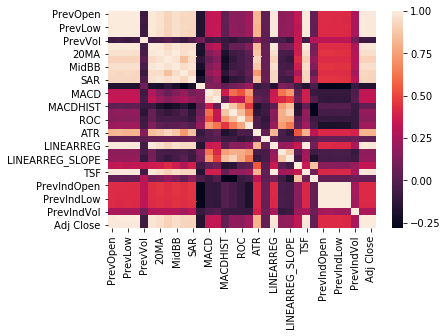

In [14]:
# It's good to know what these values are. You can see if there's
# a huge outlier from human error that needs to be dealt with
# in your dataset, etc.

# Finding correlation between attributes and plotting heatmaps,
# then saving them in our main directory for later if wanted.
print('[INFO] Printing the Pearson Correlation tables...')
print("PEARSON CORRELATION")
print(df.corr(method="pearson"))
sns.heatmap(df.corr(method="pearson"))

# Create the plots directory
if not os.path.exists("./plots/"):
    os.makedirs("./plots/")

plt.savefig("./plots/heatmap_pearson.png")
plt.show() # comment this out if using .py file
plt.clf()
#plt.close() # uncomment this if using .py file

In [15]:
# Generate a report with lots of statistical information and export to .txt file
# for later reference if needed.

# create directory to store stats summaries in
if not os.path.exists("./statistical summaries/"):
    os.makedirs("./statistical summaries/")

file_report = 'statistical summaries/' + ticker_input + ".txt"
with open(file_report, "w") as f:
    f.write("Features shape : {}".format(df.drop("Adj Close", axis=1).shape))
    f.write("\n")

    f.write("Target shape   : {}".format(df["Adj Close"].shape))
    f.write("\n")

    f.write("\nColumn names")
    f.write("\n")
    f.write(str(df.columns))
    f.write("\n")

    f.write("\nStatistical summary")
    f.write("\n")
    f.write(str(df.describe(include='all')))
    f.write("\n")

    f.write("\nDatatypes")
    f.write("\n")
    f.write(str(df.dtypes))
    f.write("\n")

    f.write("\nPEARSON correlation")
    f.write("\n")
    f.write(str(df.corr(method="pearson")))
    f.write("\n")

    f.write("\nMissing Values")
    f.write("\n")
    f.write(str(pd.isnull(df).any()))

From here, we can see which features are highly correlated to
each other. This is important because if some features are 
almost identically correlated to eachother, we won't need both
of them in our datasets. We will deal with this more during 
the feature selection phase, but this gives a nice visual
of how your feautres correlate to each other. The images created
are saved in the project's main directory for your review.

Let's create some more visualizations. You can review how to 
read these plots online and at the links given below :)
Then save those plot images too. We won't show them here,
just see the saved images in the working directory.

In [16]:
# Univariates
sns.set(color_codes=True)
colors = ["y", "b", "g", "r"]

cols = list(df.columns.values)
if not os.path.exists("./plots/univariate/box"):
    os.makedirs("./plots/univariate/box")

# Box plots
# https://www.khanacademy.org/math/ap-statistics/summarizing-quantitative-data-ap/stats-box-whisker-plots/v/reading-box-and-whisker-plots
for i, col in enumerate(cols):
    sns.boxplot(df[col], color=random.choice(colors), orient="v")
    plt.savefig("./plots/univariate/box/box_" + str(i) + ".png")
    plt.clf()
    plt.close()

if not os.path.exists("plots/univariate/density"):
    os.makedirs("./plots/univariate/density")

# Kernel Density plots
# https://en.wikipedia.org/wiki/Kernel_density_estimation
for i, col in enumerate(cols):
    sns.distplot(df[col], color=random.choice(colors))
    plt.savefig("./plots/univariate/density/density_" + str(i) + ".png")
    plt.clf()
    plt.close()
# Commented out as I get "LinAlgError: singular matrix" error after I added in 
# all those technical indicators.

# Bivariates
if not os.path.exists("./plots/multivariate"):
    os.makedirs("./plots/multivariate")

# Scatter plots
for i, col in enumerate(cols):
    try:
        if (i == len(cols) - 1):
            pass
        else: 
            sns.jointplot(x=col, y="Adj Close", data=df);
            plt.savefig("./plots/multivariate/target_vs_" + str(i) + ".png")
            plt.clf()
            plt.close()
    except:
        pass


# Pairplot
#sns.pairplot(df) 
#plt.savefig("plots/pairplot.png")
#plt.clf()
#plt.close()
# I've commented this out because trying to create a pairplot
# image of a large dataset can take a while and make a big image file, so feel
# free to add this back in if you want but expect it to be slow.

# An alternative would be...
#sns.pairplot(df.sample(1000)) 
#plt.savefig("plots/pairplot.png")
#plt.clf()
#plt.close()

print('Done visualizing!')

Done visualizing!


# 5. AUTOMATED FEATURE ENGINEERING! WOOO!

We will be using the Featuretools module for this step of the process.
Feature Engineering, in a very basic sense, is the creation of new
features, using the current features of your dataset. To do this
part manually, data scientists would have to have some domain knowledge
of the field they're working with. If you had a dataset of sales numbers
and geographical locations, adding another column or feature of say, the ratio
of sales per geographical location would show the relationshiop between sales and
the location, giving our model more data to work with. Automatic Feature 
Engineering takes care of this step for us by creating lots of new features
using the entire dataset to bring to light hidden relationships between the
features, effectively mitigating the need to know "everything" about the 
field you're trying to figure out. More feature engineering can be found here:
https://www.analyticsvidhya.com/blog/2018/08/guide-automated-feature-engineering-featuretools-python/

In our example, if we have the 9 MA and 20 MA values, using Deep Feature Synthesis,
it would create added columns like "9MA > 20MA", "9MA < 20MA", "Adj Close > 9MA",
the list can go on and on, as we'll see in a minute.

In [17]:
# "Reset" the index column for Featuretools to use now "Date" column as the index, then we'll revert
# the Date column back to an index after feature engineering is done (creating a new, bigger dataset).
# But first, save the date column for later re-instating.

# These if statements are a way of preventing over additions of indexes when re-running the 
# notebook. Just ignore it and move on.
if "level_0" in df:
    df = df.drop('level_0',axis=1)
if "index" in df:
    df = df.drop('index',axis=1)
if 'Date' in df:
    date_values = df['Date']
df = df.reset_index()
print(df.head())

        Date  PrevOpen  PrevHigh  PrevLow  PrevAdjClose   PrevVol   9MA  20MA  \
0 2012-01-06     14.30     14.99    14.19         14.50 55,400.00 14.17 13.35   
1 2012-01-09     15.00     15.00    14.32         14.52 97,500.00 14.23 13.46   
2 2012-01-10     14.61     14.61    14.36         14.50 75,200.00 14.30 13.60   
3 2012-01-11     14.51     14.98    14.32         14.81 65,500.00 14.38 13.68   
4 2012-01-12     14.76     14.76    14.20         14.48 22,500.00 14.48 13.74   

   UpperBB  MidBB    ...      STDDEV   TSF  VAR  PrevIndOpen  PrevIndHigh  \
0    15.03  13.24    ...        0.19 14.78 0.04        34.75        35.69   
1    15.17  13.35    ...        0.24 14.86 0.06        35.53        35.87   
2    15.20  13.49    ...        0.25 14.85 0.06        36.14        36.30   
3    15.26  13.64    ...        0.25 14.77 0.06        36.64        36.97   
4    15.34  13.71    ...        0.12 14.66 0.02        36.90        37.20   

   PrevIndLow  PrevIndClose   PrevIndVol  Open  Ad

In [18]:
# Let's do it! Auto Feature Engineering using Feature Tools
import featuretools as ft
#print(ft.list_primitives().to_string()) # To get full list of primitives that could be used

print('Adding the engineered features to the dataframe. This may take a hot minute...')

# Define the function. We do this in case there's a runtime error, it won't
# start the program over again, just stays within the function
def feature_engineering_dataset(df):
    es = ft.EntitySet(id = 'stockdata')

# Now we make sure that the dataframe we feed to the featuretools doesn't include
# our label. Notice the drop? Because we don't want to engineer features using the
# label that hasn't happened yet, right?
    adj_close = list(df['Adj Close'])
    dataframe = df.drop('Adj Close',axis=1)
    es.entity_from_dataframe(entity_id = 'data', dataframe = dataframe, index = 'Date')

# Pesky warnings
    warnings.filterwarnings("ignore", category=RuntimeWarning) 
    warnings.filterwarnings("once", category=ImportWarning)

# Run deep feature synthesis with transformation primitives
# Depending on how many features are being added to the dataset,
# you may need to tweak the chunk_size and n_jobs variables below.
# n_jobs should be tweaked for how many processors are on your
# machine, and the chunk_size should be big enough to run quickly,
# but small enough that each chunk can fit into memory. See the 
# Featuretools website for more information on this.
    feature_matrix, feature_defs = ft.dfs(n_jobs=1,entityset = es, target_entity = 'data', 
                                           chunk_size=0.01,max_depth=2,verbose=True,
                    #agg_primitives = ['avg_time_between',
                     #   'trend','std',],    # review "print(ft.list_primitives().to_string())" for more
                    trans_primitives = [
                        'less_than_equal_to',
                        'greater_than_equal_to'
                    ])
    warnings.filterwarnings("once", category=RuntimeWarning) 

# Now re-add the Adj Close column because featuretools...
    feature_matrix['Adj Close'] = adj_close

# Return our new dataset!
    return(feature_matrix)

# Now run that defined function
df = feature_engineering_dataset(df)

# Now save a new .csv file with our new features in it for review later if we want
if not os.path.exists("./historical data/"):
    os.makedirs("./historical data/")
dataset.to_csv('./historical data/' + ticker_input + '_with_feature_matrix.csv')

C:\Users\windowshopr\AppData\Local\Programs\Python\Python36\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
C:\Users\windowshopr\AppData\Local\Programs\Python\Python36\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
C:\Users\windowshopr\AppData\Local\Programs\Python\Python36\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
C:\Users\windowshopr\AppData\Local\Programs\Python\Python36\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
C:\Users\windowshopr\AppData\Local\Programs\Python\Python36\lib\importlib\_bootstrap.py:219: ImportWarni

Adding the engineered features to the dataframe. This may take a hot minute...
Built 2016 features
Elapsed: 03:47 | Remaining: 00:00 | Progress: 100%|████████████████████████████████████████| Calculated: 101/101 chunks


In [19]:
print(df.head())
print('Behold our new dataset! Huzzah! (Remember, theres not really 5 rows, we just printed the head.)')

            PrevOpen  PrevHigh  PrevLow  PrevAdjClose   PrevVol   9MA  20MA  \
Date                                                                          
2012-01-06     14.30     14.99    14.19         14.50 55,400.00 14.17 13.35   
2012-01-09     15.00     15.00    14.32         14.52 97,500.00 14.23 13.46   
2012-01-10     14.61     14.61    14.36         14.50 75,200.00 14.30 13.60   
2012-01-11     14.51     14.98    14.32         14.81 65,500.00 14.38 13.68   
2012-01-12     14.76     14.76    14.20         14.48 22,500.00 14.48 13.74   

            UpperBB  MidBB  LowerBB    ...      LINEARREG >= PrevIndVol  \
Date                                   ...                                
2012-01-06    15.03  13.24    11.45    ...                        False   
2012-01-09    15.17  13.35    11.53    ...                        False   
2012-01-10    15.20  13.49    11.78    ...                        False   
2012-01-11    15.26  13.64    12.03    ...                        False

# 6. AUTOMATED FEATURE SELECTION

Now, as you'll see, we have way more columns in our dataset than when we 
first started. Surely we don't need ALL of these columns before training
our model do we? Nope!

So what we'll do now is utilize the Feature-Selector module to help us
perform automated feature selection. What's going to happen here is,
it's going to find features that have more than 60% missing values,
have a correlation threshold of more than 98% (remember our correlation
heatmap from before?), and maybe most importantly, get rid of any 
features that don't add up to a max feature importance of 99%! This uses
lightgbm to train a quick model to determine which features are the least
important, then get rid of them, leaving us with an awesome dataset!

https://github.com/WillKoehrsen/feature-selector

In [20]:
# Let's go!
#df = df.set_index('Date')
print(df.head())

def feature_removal_func(df):
# Name all the feature columns and target label column for FeatureSelector...
# Save the open price as FS removes it due to high correlation, but we want to keep it    
    openprice = df["Open"]
    features = df.drop("Adj Close", axis=1)
    label = df["Adj Close"]

# Now, drop all columns of low importance, crazy high correlation, etc.
    from feature_selector import FeatureSelector
    fs = FeatureSelector(data = features, labels = label)
    fs.identify_all(selection_params = {'missing_threshold': 0.6,    
                                    'correlation_threshold': 0.98, 
                                    'task': 'regression',    
                                    'eval_metric': 'mse', 
                                    'cumulative_importance': 0.99})
    all_to_remove = fs.check_removal()
    print(all_to_remove[:])
    df = fs.remove(methods = 'all')

# Re-Add the Open. And Adj Close to the df because FeatureTools removes it once you assign it as the label for some reason
    df['Open'] = openprice
    df['Adj Close'] = label
    return(df)

df = feature_removal_func(df)

print(df.head())
print('Our wonderful, new dataset has been created!')

            PrevOpen  PrevHigh  PrevLow  PrevAdjClose   PrevVol   9MA  20MA  \
Date                                                                          
2012-01-06     14.30     14.99    14.19         14.50 55,400.00 14.17 13.35   
2012-01-09     15.00     15.00    14.32         14.52 97,500.00 14.23 13.46   
2012-01-10     14.61     14.61    14.36         14.50 75,200.00 14.30 13.60   
2012-01-11     14.51     14.98    14.32         14.81 65,500.00 14.38 13.68   
2012-01-12     14.76     14.76    14.20         14.48 22,500.00 14.48 13.74   

            UpperBB  MidBB  LowerBB    ...      LINEARREG >= PrevIndVol  \
Date                                   ...                                
2012-01-06    15.03  13.24    11.45    ...                        False   
2012-01-09    15.17  13.35    11.53    ...                        False   
2012-01-10    15.20  13.49    11.78    ...                        False   
2012-01-11    15.26  13.64    12.03    ...                        False

C:\Users\windowshopr\AppData\Local\Programs\Python\Python36\lib\site-packages\lightgbm\__init__.py:27: ResourceWarning: unclosed file <_io.TextIOWrapper name='C:\\Users\\windowshopr\\AppData\\Local\\Programs\\Python\\Python36\\lib\\site-packages\\lightgbm\\VERSION.txt' mode='r' encoding='cp1252'>
  __version__ = open(os.path.join(dir_path, 'VERSION.txt')).read().strip()


0 features with greater than 0.60 missing values.

842 features with a single unique value.

932 features with a correlation magnitude greater than 0.98.

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[175]	valid_0's l2: 2.76672
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[157]	valid_0's l2: 3.69196
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[239]	valid_0's l2: 3.26372
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[145]	valid_0's l2: 2.2825
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[98]	valid_0's l2: 3.11058
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[112]	valid_0's l2: 3.21604
Training until validation scores don't improve for 100 ro

['MOM <= MidBB', 'PrevLow >= PrevIndLow', 'PrevHigh <= PrevAdjClose', 'STDDEV >= LINEARREG', 'RSI >= PrevIndHigh', 'ADX <= Open', 'PrevIndClose >= TSF', '20MA <= LINEARREG', 'Open <= STDDEV', 'PrevLow >= UpperBB', 'LINEARREG <= PrevIndOpen', 'STDDEV <= LINEARREG', 'PrevLow >= ROC', 'ATR >= RSI', 'SAR >= PrevLow', 'MACDHIST <= PrevIndOpen', 'PrevIndHigh >= PrevIndLow', 'ADX <= PrevIndOpen', 'MOM >= STDDEV', 'MOM >= PrevVol', 'PrevIndLow >= PrevLow', 'PrevIndHigh', 'UpperBB <= STDDEV', 'LINEARREG_SLOPE >= LINEARREG_ANGLE', 'PrevVol <= TSF', 'PrevIndOpen >= PrevIndVol', 'PrevIndLow >= Open', 'Open >= RSI', 'LINEARREG >= PrevIndVol', 'RSI >= PrevLow', 'VAR >= PrevIndHigh', 'MACD >= LINEARREG_SLOPE', 'MidBB >= PrevIndClose', 'PrevLow <= ATR', 'MACD >= PrevIndVol', 'MACDSIGNAL >= VAR', 'PrevIndVol <= LINEARREG', '9MA <= STDDEV', 'MidBB <= BETA', 'PrevIndVol >= PrevIndLow', 'PrevIndOpen <= RSI', 'VAR >= PrevLow', 'PrevHigh <= ATR', 'MidBB <= PrevIndClose', 'UpperBB >= ATR', 'Open <= PrevIndLo

['missing', 'single_unique', 'collinear', 'zero_importance', 'low_importance'] methods have been run

Removed 1925 features.
            PrevOpen   PrevVol  UpperBB  LowerBB   SAR   ADX  MACD  \
Date                                                                 
2012-01-06     14.30 55,400.00    15.03    11.45 12.97 43.68  0.42   
2012-01-09     15.00 97,500.00    15.17    11.53 13.17 44.32  0.45   
2012-01-10     14.61 75,200.00    15.20    11.78 13.39 44.90  0.47   
2012-01-11     14.51 65,500.00    15.26    12.03 13.58 45.76  0.50   
2012-01-12     14.76 22,500.00    15.34    12.09 13.75 46.21  0.50   

            MACDSIGNAL  MACDHIST  MOM    ...      BETA <= LINEARREG_SLOPE  \
Date                                     ...                                
2012-01-06        0.27      0.15 1.68    ...                         True   
2012-01-09        0.31      0.15 0.76    ...                         True   
2012-01-10        0.34      0.13 0.42    ...                         True   

In [21]:
# Wonderful! Well done!
# Now, let's do some quick housekeeping on our new dataset.
# Move the Open and Adj Close columns to the end again
opencolumn = df['Open']
adjclosecolumn = df['Adj Close']

df = df.drop(['Open'],axis=1)
df = df.drop(['Adj Close'],axis=1)

df['Open'] = opencolumn
df['Adj Close'] = adjclosecolumn

In [22]:
# Check it to make sure it worked
print(df.columns)

Index(['PrevOpen', 'PrevVol', 'UpperBB', 'LowerBB', 'SAR', 'ADX', 'MACD',
       'MACDSIGNAL', 'MACDHIST', 'MOM', 'ROC', 'RSI', 'ATR', 'BETA',
       'LINEARREG_ANGLE', 'STDDEV', 'PrevIndOpen', 'PrevIndVol',
       'MACDSIGNAL <= LINEARREG_SLOPE', 'PrevOpen <= 9MA', 'SAR <= 20MA',
       'BETA <= MACD', 'MACDHIST <= BETA', 'MOM <= MACD', 'BETA <= MACDSIGNAL',
       'LINEARREG <= PrevHigh', '9MA <= PrevLow', 'PrevOpen <= SAR',
       'PrevIndLow <= SAR', 'PrevIndLow <= PrevIndClose', 'SAR <= RSI',
       'MidBB <= PrevLow', 'PrevAdjClose <= TSF', 'TSF <= Open',
       'MidBB <= 9MA', 'MACD <= VAR', 'MOM <= BETA', 'PrevOpen <= Open',
       'TSF <= PrevLow', 'STDDEV <= MACDSIGNAL', 'VAR <= MOM',
       'PrevHigh <= PrevOpen', 'LowerBB <= SAR', 'PrevIndOpen <= PrevIndClose',
       'LINEARREG_SLOPE <= MACD', 'PrevOpen <= TSF', 'PrevOpen <= MidBB',
       'PrevOpen <= PrevIndLow', '9MA <= PrevHigh', 'ATR <= MOM',
       'LowerBB <= PrevAdjClose', 'LINEARREG_ANGLE <= ROC',
       'PrevIndL

In [23]:
# Now check the new types of the features, because you'll see now
# that we have True and False boolean values, that we'll turn into numerical
# values of 1 and 0 below, because machine learners like numbers not words.
# Convert boolean True False datapoints to 1 and 0
df = df.applymap(lambda x: 1 if x == True else x)
df = df.applymap(lambda x: 0 if x == False else x)

# Now check to make sure our data is all numeric int's and float's.
print('[INFO] New Feature types:')
print(df.dtypes)

[INFO] New Feature types:
PrevOpen                         float64
PrevVol                          float64
UpperBB                          float64
LowerBB                          float64
SAR                              float64
ADX                              float64
MACD                             float64
MACDSIGNAL                       float64
MACDHIST                         float64
MOM                              float64
ROC                              float64
RSI                              float64
ATR                              float64
BETA                             float64
LINEARREG_ANGLE                  float64
STDDEV                           float64
PrevIndOpen                      float64
PrevIndVol                       float64
MACDSIGNAL <= LINEARREG_SLOPE      int64
PrevOpen <= 9MA                    int64
SAR <= 20MA                        int64
BETA <= MACD                       int64
MACDHIST <= BETA                   int64
MOM <= MACD                    

In [24]:
# Let's see the dataframe head again.
print(df.head())
print('Done!')

            PrevOpen   PrevVol  UpperBB  LowerBB   SAR   ADX  MACD  \
Date                                                                 
2012-01-06     14.30 55,400.00    15.03    11.45 12.97 43.68  0.42   
2012-01-09     15.00 97,500.00    15.17    11.53 13.17 44.32  0.45   
2012-01-10     14.61 75,200.00    15.20    11.78 13.39 44.90  0.47   
2012-01-11     14.51 65,500.00    15.26    12.03 13.58 45.76  0.50   
2012-01-12     14.76 22,500.00    15.34    12.09 13.75 46.21  0.50   

            MACDSIGNAL  MACDHIST  MOM    ...      BETA <= LINEARREG_SLOPE  \
Date                                     ...                                
2012-01-06        0.27      0.15 1.68    ...                            1   
2012-01-09        0.31      0.15 0.76    ...                            1   
2012-01-10        0.34      0.13 0.42    ...                            1   
2012-01-11        0.37      0.13 0.79    ...                            1   
2012-01-12        0.40      0.10 0.35    ...   

In [25]:
# I inserted this cell here again to deal with more nan values that
# show up after our feature engineering step. I'm going to print what my
# dataframe shape looks like before and after dropping the nan values.
# If the change is insignifcant, we'll carry on, otherwise I may look at
# replacing them with the mean of each column.
print(df.shape)

(1914, 93)


In [26]:
# Now drop em
df = df.dropna(how='any')
print(df.shape)

(1914, 93)


In [27]:
# Now confirm if we have any nan values. All Falses? Great!
print(pd.isnull(df).any())

PrevOpen                         False
PrevVol                          False
UpperBB                          False
LowerBB                          False
SAR                              False
ADX                              False
MACD                             False
MACDSIGNAL                       False
MACDHIST                         False
MOM                              False
ROC                              False
RSI                              False
ATR                              False
BETA                             False
LINEARREG_ANGLE                  False
STDDEV                           False
PrevIndOpen                      False
PrevIndVol                       False
MACDSIGNAL <= LINEARREG_SLOPE    False
PrevOpen <= 9MA                  False
SAR <= 20MA                      False
BETA <= MACD                     False
MACDHIST <= BETA                 False
MOM <= MACD                      False
BETA <= MACDSIGNAL               False
LINEARREG <= PrevHigh    

In [28]:
# This section has been added in to remove certain characters that XGBoost
# doesn't recognize in the Feature/Column names or else we are going to get 
# an error after training occurs:
# ValueError: feature_names may not contain [, ] or <
import re
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
df.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']'))) else col for col in df.columns.values]
df.columns = [regex.sub("LESSTHAN", col) if any(x in str(col) for x in set(('<'))) else col for col in df.columns.values]

# 7. SPLIT THE DATASET FOR TRAINING/TESTING AND PREDICTIONS

In [29]:
# We're getting close to training our model! Congrats for
# hanging on this far.

# First, we're going to extract a section of recent data from our dataset
# to be used as a "prediction" dataset after we've trained our model.
# This dataset will be used to see how well our model predicts on
# new data that is hasn't yet seen before/wasn't involved in the
# training process.
prediction_df = df.tail(90).copy() # Make sure you make it a copy, else errors arise later. default 90 days
df = df.iloc[:-90,:].copy() # subtracting those 90 rows/days from the soon to be training dataset so that
                            # we're not training on the prediction data as well.

In [30]:
# Split the dataset into features (X) and a target (Y)
# and print the shapes of them
X = df.drop('Adj Close', axis=1) # Everything but what we're trying to predict
Y = df['Adj Close'] # This is what we're trying to predict

print('Shape of features: ', X.shape)

Shape of features:  (1824, 92)


In [31]:
print('Shape of target: ', Y.shape)

Shape of target:  (1824,)


In [32]:
# Standardize the data. Commenting this out until I can figure out how to
# unscale the prediction dataset for review later. This helps with model
# training performance and other reasons, but be careful because if you standardize a training
# dataset, then go to use the model on a new prediction dataset, if that 
# new dataset has values greater or less than your standarized scale,
# the model might not be as accurate. Maybe scale to a MinMax of having
# a 10-20% buffer above/below???
#from sklearn.preprocessing import StandardScaler, MinMaxScaler
#scaler = MinMaxScaler().fit(X)
#scaled_X = scaler.transform(X)

In [33]:
# Split dataset into training and testing/validation data. Think of this as,
# the model learns from the testing data, then tests to see how well it did
# (internally) on the testing data. Much like what we're going to do with the
# model on our prediction dataset later.
from sklearn.model_selection import train_test_split

seed = 9 # For reproducibility of the data in future steps
test_size = 0.25 # 75% training, 25% testing

# This also randomly shuffles the data. We're going to disable this because we 
# are dealing with a time series problem. We don't want our model to just
# recognize an overall uptrend in our data though, so we're going to employ
# cross validation in a minute to combat this.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed, shuffle=False)

# Now, becuase we're using many different types of regression algorithms in
# TPOT, we need to make sure that every one of them can understand our data
# in the same way, so long story short, convert the training features, and 
# testing features to Numpy arrays, but leave the Y's as a DF. It's a long
# story and I had many errors to deal with in figuring this portion out.
# See https://github.com/EpistasisLab/tpot/issues/738
# or https://stackoverflow.com/questions/57488274/feature-names-mismatch-when-passing-x-test-to-predict-function-again-still
# ...if you want.
X_train=X_train.values
X_test=X_test.values

In [34]:
print('[INFO] Printing the shapes of the training/testing feature/label sets...')
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)


# I know it's tedious to keep printing the data and shapes like this, but the
# further along you get in your coding, the more important it becomes to know
# exactly what type of data is being passed from step to step to help mitigate
# and pinpoint where you might run into any errors.

[INFO] Printing the shapes of the training/testing feature/label sets...
(1368, 92)
(456, 92)
(1368,)
(456,)


# 8. TRAIN A MODEL USING TPOT

The time is finally here! Time to train a regression model. Think...

regression = predicting a number

classification = predicting a category

Since we're predicting the daily closing price, we need regression.
TPOT is a module that automates the process of finding the best
machine learning model (or stack of models) for your dataset, with 
the best hyperparameter(s) for each one, a process that would 
normally need to be done manually. This automated machine learning
is a no-brainer. Let it do the magic for you so you don't have to.
Notice how I like the idea of automation, like feature engineering,
selection, regression analysis, etc.? It just makes sense, even if
it's a little more computationally taxing (although we try to do it 
as efficiently as possible).

The way I describe this part is, you have some specific music (data), and
you're trying to pick the best sound system (regression pipeline)
to get the best sound (prediction). Each of the amplifiers (algorithms)
have a set of dials (hyperparameters) that need adjusting and tweaking
to get right. And maybe stacking multiple amplifiers would make the music sound
even better! So what TPOT does is it trains a model to get the best possible
result (i.e. lowest loss function) by trying many, MANY different combinations
of amplifiers and dial settings to end up with the best possible sound system.
Make sense? Let's do it!

In [35]:
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, max_error, mean_absolute_error, mean_squared_log_error, median_absolute_error
from tpot import TPOTRegressor

# I made a custom config dictionary for TPOT to use.
# I've made this list full of Regressors that use the
# .feature_importances_ attribute of sklearn to review
# what the feature imporances are once the model is run.

# This is the list of regressors and pre-processors
# that I've used. You can add or subtract to this list,
# but you may end up running into errors when it comes to displaying
# the feature importances part that you'll have to deal with.
# Read here for more: https://epistasislab.github.io/tpot/using/#customizing-tpots-operators-and-parameters

# Define the protecting function.
def train_function(X_train, Y_train):
    warnings.simplefilter(action='once', category=FutureWarning)
    warnings.simplefilter(action='once', category=UserWarning)
    warnings.simplefilter(action='once', category=DeprecationWarning)
    warnings.simplefilter(action='once', category=ImportWarning)
    
    tpot_config = {

    'xgboost.XGBRegressor': {
        'n_estimators': [100],
        'max_depth': range(1, 11),
        'learning_rate': [1e-3, 1e-2, 1e-1, 0.5, 1.],
        'subsample': np.arange(0.05, 1.01, 0.05),
        'min_child_weight': range(1, 21),
        'nthread': [1],
        'objective': ['reg:squarederror']
    },
        

    'sklearn.ensemble.ExtraTreesRegressor': {
        'n_estimators': [100],
        'max_features': np.arange(0.05, 1.01, 0.05),
        'min_samples_split': range(2, 21),
        'min_samples_leaf': range(1, 21),
        'bootstrap': [True, False]
    },

    'sklearn.ensemble.GradientBoostingRegressor': {
        'n_estimators': [100],
        'loss': ["ls", "lad", "huber", "quantile"],
        'learning_rate': [1e-3, 1e-2, 1e-1, 0.5, 1.],
        'max_depth': range(1, 11),
        'min_samples_split': range(2, 21),
        'min_samples_leaf': range(1, 21),
        'subsample': np.arange(0.05, 1.01, 0.05),
        'max_features': np.arange(0.05, 1.01, 0.05),
        'alpha': [0.75, 0.8, 0.85, 0.9, 0.95, 0.99]
    },

    'sklearn.ensemble.AdaBoostRegressor': {
        'n_estimators': [100],
        'learning_rate': [1e-3, 1e-2, 1e-1, 0.5, 1.],
        'loss': ["linear", "square", "exponential"]
    },

    'sklearn.tree.DecisionTreeRegressor': {
        'max_depth': range(1, 11),
        'min_samples_split': range(2, 21),
        'min_samples_leaf': range(1, 21)
    },

    'sklearn.ensemble.RandomForestRegressor': {
        'n_estimators': [100],
        'max_features': np.arange(0.05, 1.01, 0.05),
        'min_samples_split': range(2, 21),
        'min_samples_leaf': range(1, 21),
        'bootstrap': [True, False]
    },


    # Preprocesssors
    'sklearn.preprocessing.Binarizer': {
        'threshold': np.arange(0.0, 1.01, 0.05)
    },

    'sklearn.decomposition.FastICA': {
        'tol': np.arange(0.0, 1.01, 0.05)
    },

    'sklearn.cluster.FeatureAgglomeration': {
        'linkage': ['ward', 'complete', 'average'],
        'affinity': ['euclidean', 'l1', 'l2', 'manhattan', 'cosine']
    },

    'sklearn.preprocessing.MaxAbsScaler': {
    },

    'sklearn.preprocessing.MinMaxScaler': {
    },

    'sklearn.preprocessing.Normalizer': {
        'norm': ['l1', 'l2', 'max']
    },

    'sklearn.kernel_approximation.Nystroem': {
        'kernel': ['rbf', 'cosine', 'chi2', 'laplacian', 'polynomial', 'poly', 'linear', 'additive_chi2', 'sigmoid'],
        'gamma': np.arange(0.0, 1.01, 0.05),
        'n_components': range(1, 11)
    },

    'sklearn.decomposition.PCA': {
        'svd_solver': ['randomized'],
        'iterated_power': range(1, 11)
    },

    'sklearn.preprocessing.PolynomialFeatures': {
        'degree': [2],
        'include_bias': [False],
        'interaction_only': [False]
    },

    'sklearn.kernel_approximation.RBFSampler': {
        'gamma': np.arange(0.0, 1.01, 0.05)
    },

    'sklearn.preprocessing.RobustScaler': {
    },

    'sklearn.preprocessing.StandardScaler': {
    },

    'tpot.builtins.ZeroCount': {
    },

    'tpot.builtins.OneHotEncoder': {
        'minimum_fraction': [0.05, 0.1, 0.15, 0.2, 0.25],
        'sparse': [False],
        'threshold': [10]
    },


    # Selectors
    'sklearn.feature_selection.SelectFwe': {
        'alpha': np.arange(0, 0.05, 0.001),
        'score_func': {
            'sklearn.feature_selection.f_regression': None
        }
    },

    'sklearn.feature_selection.SelectPercentile': {
        'percentile': range(1, 100),
        'score_func': {
            'sklearn.feature_selection.f_regression': None
        }
    },

    'sklearn.feature_selection.VarianceThreshold': {
        'threshold': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.2]
    },

    'sklearn.feature_selection.SelectFromModel': {
        'threshold': np.arange(0, 1.01, 0.05),
        'estimator': {
            'sklearn.ensemble.ExtraTreesRegressor': {
                'n_estimators': [100],
                'max_features': np.arange(0.05, 1.01, 0.05)
            }
        }
    }

}

# Now comes another important aspect of the training/testing phase;
# Cross Validation. CV is action of replacing the testing portion
# of your training/testing dataset with a new section within that
# same dataset. So in our example, we are using a 75/25 split.
# During the first "fold" of our CV run, we train on that 75 
# data, and test on the 25. Then in the next fold, we take a random
# 25% data from the 75% data and swap it out with the current 25%.
# This is important because it's a way to prevent "over-fitting" our
# model to our data. If we were training a model on Amazon's stock prices,
# without randomly shuffling the testing/training data, and without CV,
# eventually our model would learn to just buy and hold that stock to 
# get the best result, but that doesn't mean the model has good
# predictive capabilities because it wouldn't know what to do when it 
# starts going down. CV helps to truncate the full historical data to 
# train on various sections within the data. More here:

# https://towardsdatascience.com/overfitting-vs-underfitting-a-complete-example-d05dd7e19765

# TPOT does this cross validation for us already. Yay!


# Cross Validation folds to run
    folds   = 30 # Default is 10, I'm doing more 

    #earlystop = 30 # could have this feature added in if you want, I don't for now)


# Define the TPOT Regressor.
# It's nice to have Dask installed/running during this part. Dask utilizes
# parallel computing, meaning dividing the same task across a number of 
# "workers" (i.e. computer processors) to get a job done faster!
# If you don't want to use it, make it false, and get rid of the n_jobs parameter.
# n_jobs = -1 means use all available workers. Can set to 1, 2, 300, depending on
# how many processors you have. See the TPOT API for more info :D

# Also, review what the generations and population sizes mean when it comes to how
# many regressors are going to be used during the optimization process. Again, look here:
# https://epistasislab.github.io/tpot/api/#regression
    best_model = TPOTRegressor(use_dask=True, n_jobs=1, config_dict=tpot_config, cv=folds,
                          generations=10, population_size=40, verbosity=2, random_state=seed)
                          #early_stop=earlystop) #memory='./PipelineCache',       memory='auto',

# Fit the TPOT regression to our training data to find the best model. Woohoo!
    best_model.fit(X_train, Y_train)

# Export the TPOT pipeline if you want to use it for anything later
    if os.path.exists('./exported pipelines'):
        pass
    else:
        os.mkdir('./exported pipelines')
    best_model.export('./exported pipelines/' + ticker_input + '-prediction-pipeline.py')
    
    best_model = best_model
    return(best_model)

# Now run the function!
best_model = train_function(X_train, Y_train)

C:\Users\windowshopr\AppData\Local\Programs\Python\Python36\lib\site-packages\deap\tools\_hypervolume\pyhv.py:33: ImportWarning: Falling back to the python version of hypervolume module. Expect this to be very slow.
  "module. Expect this to be very slow.", ImportWarning)


Generation 1 - Current best internal CV score: -5.617574847627383
Generation 2 - Current best internal CV score: -5.392925650474486
Generation 3 - Current best internal CV score: -5.392925650474486
Generation 4 - Current best internal CV score: -5.392925650474486
Generation 5 - Current best internal CV score: -5.392925650474486
Generation 6 - Current best internal CV score: -5.260649779184337
Generation 7 - Current best internal CV score: -5.224619294199957
Generation 8 - Current best internal CV score: -5.217801746185675
Generation 9 - Current best internal CV score: -5.217801746185675
Generation 10 - Current best internal CV score: -5.215785947649995

Best pipeline: RandomForestRegressor(SelectFwe(SelectPercentile(input_matrix, percentile=40), alpha=0.029), bootstrap=True, max_features=0.9000000000000001, min_samples_leaf=8, min_samples_split=15, n_estimators=100)


In [36]:
print('[INFO] TPOTs best pipeline is:')
print(best_model.fitted_pipeline_.steps[-1][1])
print('We are done training the model! You can view the feature importances plot in your directory now.')
print('It is now time to predict the values in the testing/validation set and see how well it did internally...')

[INFO] TPOTs best pipeline is:
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=0.9000000000000001, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=8, min_samples_split=15,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)
We are done training the model! You can view the feature importances plot in your directory now.
It is now time to predict the values in the testing/validation set and see how well it did internally...


In [37]:
print('[INFO] Printing the shape of X_test for debugging the predict function...')
#print(X_test[:,:])
print(X_test.shape)

# Now let's make sure X_test columns are in the same layout as X_train...
#X_test = X_test[X_train.columns]
#print(X_test.shape) # for debugging

[INFO] Printing the shape of X_test for debugging the predict function...
(456, 92)


# 9. TEST THE MODEL ON THE TESTING/VALIDATION DATASET

In [38]:
# This is to see how well it did internally using its testing data (25%).
# Make predictions using the tuned model and display error metrics,

# Now make the predictions using our model and display the metrics
predictions = best_model.predict(X_test)

# ...but first, let's assign some variables to use for calculating the 
# Adjust R Squared value
data_points = int(X_test.shape[0])
feature_points = int(X_test.shape[1])
r_squared = round(r2_score(Y_test, predictions), 3)


print('=============================')
print("TPOT's final score on testing dataset is : ", best_model.score(X_test, Y_test))
print('=============================')
print("[INFO] MSE on test set : {}".format(round(mean_squared_error(Y_test, predictions), 3)))
print("[INFO] Max Error on test set : {}".format(round(max_error(Y_test, predictions), 3)))
print("[INFO] MAE on test set : {}".format(round(mean_absolute_error(Y_test, predictions), 3)))
print("[INFO] MSLE on test set : {}".format(round(mean_squared_log_error(Y_test, predictions), 3)))
print("[INFO] Median AE on test set : {}".format(round(median_absolute_error(Y_test, predictions), 3)))
print('---------------------------------')
print('[INFO] R2 Score on test set : {}'.format(r_squared))
print('[INFO] Adjusted R2 Score on test set : {}'.format(round(1 - (1 - r_squared) * (data_points*feature_points - 1) / (data_points*feature_points - feature_points - 1), 3))) # Adjusted R Squared formula :D
print('[INFO] Explained Variance Score on test set : {}'.format(round(explained_variance_score(Y_test, predictions), 3)))

# Homework assignment; google what these error metrics mean :D
# Hint. https://www.bmc.com/blogs/mean-squared-error-r2-and-variance-in-regression-analysis/   

# Now create another lovely plot for us to save.
# Plot between predictions and Y_test
x_axis = np.array(range(0, predictions.shape[0]))
plt.figure(figsize=(40,20)) # again adjust this size as needed
plt.plot(x_axis, predictions, linestyle="--", marker="o", alpha=0.7, color='r', label="predictions")
plt.plot(x_axis, Y_test, linestyle="--", marker="o", alpha=0.7, color='g', label="Y_test")
plt.xlabel('Row number')
plt.ylabel('PRICE')
plt.title('Predictions vs Y_test')
plt.legend(loc='lower right')
plt.savefig("./plots/predictions_vs_ytest.png")
plt.clf()
plt.close()
print('--')
print('Done predicting the testing set. Now time to move on to our lovely prediction data')
print('to see how well it really performs!')

TPOT's final score on testing dataset is :  -3.5369446818583024
[INFO] MSE on test set : 3.537
[INFO] Max Error on test set : 8.634
[INFO] MAE on test set : 1.434
[INFO] MSLE on test set : 0.002
[INFO] Median AE on test set : 1.132
---------------------------------
[INFO] R2 Score on test set : 0.993
[INFO] Adjusted R2 Score on test set : 0.993
[INFO] Explained Variance Score on test set : 0.993
--
Done predicting the testing set. Now time to move on to our lovely prediction data
to see how well it really performs!


## Let's stop here for a second, take a breath and evaluate what we've done so far.

First, we downloaded daily historical stock data for an inputted stock, then scraped Yahoo Finance's website for Industry titles and subsequently downloaded its historical data as well. We then used Pandas to maniuplate the dataframe and add a couple of moving averages to the dataset. From there, we utilized automatic feature engineering and selection to find new, hidden relationships within our data, giving us insight into the data which we may or may not know anything about. We then passed that new dataset to an automatic machine learning module that optimized for the best regression pipeline with the highest predictive power we could find. Pat yourself on the back! This is some new-aged stuff you're doing here.

So looking at the results of the training/testing of our model, we see that our final model can predict the closing price of a stock to within an average of $3.54 (MSE), with an R2 value of 0.99, which suggests that our model almost perfectly explains the variance in our data. Now two things to keep in mind here:

    1. With such a high R2, would this suggest that we overfitted our model to the training data? Well, we would have to try it out on some new, unseen data to get a final verdict on its power (which we're about to do).

    2. Is predicting the closing price to within $3.54 average good enough for the data? Well that depends. If we were trying to predict the closing price of say, AMZN, which as of this writing is trading around the $1,775 - $2,000 mark, that would be an awesome prediction. If we are using a lower priced stock, like CLVS which is around $5 - $10, it's probably not the greatest. The point is, it all depends on the data you're using, and that's a decision you'll have to make for yourself. I will touch on possible ways to (potentially) improve this model later.

In [39]:
#print(prediction_df.columns) # for debugging purposes

# 9. PREDICT USING UNSEEN DATA

In [40]:
# Armed with our optimized regression pipeline thanks to TPOT, let's
# run it against our previously held-back prediciton dataset and see
# how it does!

# Move the Open and Adj Close columns to the end again.
opencolumn = prediction_df['Open']
adjclosecolumn = prediction_df['Adj Close']
prediction_df = prediction_df.drop(['Open'],axis=1)
prediction_df = prediction_df.drop(['Adj Close'],axis=1)
prediction_df['Open'] = opencolumn
prediction_df['Adj Close'] = adjclosecolumn

# Set our X features and Y label.
features = prediction_df.drop(['Adj Close'], axis=1)
labels = prediction_df['Adj Close']

print(features.shape) # for debugging

# And standardize them
#scaler = MinMaxScaler().fit(features)
#features = scaler.transform(features)

# Remember how we converted the features to a Numpy array during the
# training/testing portion? We need to do the same here for our model
# to read the data properly. Again, only do this for the features, not
# the label, or you'll likely get errors.
features=features.values

# Predict the labels! The good part.
results = best_model.predict(features)

# Now, let's add the predictions to our dataset, and then export the
# results to a .csv file for later analysis.
predictions_list = []
for preds in results:
    predictions_list.append(preds)
prediction_df['Predictions'] = predictions_list
export_filename = 'historical data/' + ticker_input + '_Final_Prediction_Performance.csv'
prediction_df.to_csv(export_filename, index=True)

# ...but first, let's assign some variables to use for calculating the 
# Adjust R Squared value
data_points = int(features.shape[0])
feature_points = int(features.shape[1])
r_squared = round(r2_score(labels, results), 3)

print(data_points)
print(feature_points)
print(r_squared) # for debugging

# Print our results and compare them to the previous testing error metrics.
print('============================')
print("[INFO] MSE on prediction set : {}".format(round(mean_squared_error(labels, results), 3)))
print("[INFO] Max Error on prediction set : {}".format(round(max_error(labels, results), 3)))
print("[INFO] MAE on prediction set : {}".format(round(mean_absolute_error(labels, results), 3)))
print("[INFO] MSLE on prediction set : {}".format(round(mean_squared_log_error(labels, results), 3)))
print("[INFO] Median AE on prediction set : {}".format(round(median_absolute_error(labels, results), 3)))
print('---------------------------------')
print('[INFO] R2 Score on prediction set : {}'.format(round(r_squared, 3)))
print('[INFO] Adjusted R2 Score on prediction set : {}'.format(round(1 - (1 - r_squared) * (data_points*feature_points - 1) / (data_points*feature_points - feature_points - 1), 3)))
print('[INFO] Explained Variance Score on prediction set : {}'.format(round(explained_variance_score(labels, results), 3)))

(90, 92)
90
92
0.78
[INFO] MSE on prediction set : 4.265
[INFO] Max Error on prediction set : 7.191
[INFO] MAE on prediction set : 1.212
[INFO] MSLE on prediction set : 0.041
[INFO] Median AE on prediction set : 0.692
---------------------------------
[INFO] R2 Score on prediction set : 0.78
[INFO] Adjusted R2 Score on prediction set : 0.778
[INFO] Explained Variance Score on prediction set : 0.828


As you can see, we actually had worse results in terms of the MSE, and a lesser R2 in terms of how well the model explains the variance in the data. Some potential reasons for this, looking at the price data in the next section, are that the stock in the last 90 days took a huge dive and consistently performed very poorly, something the regression was not used to seeing during training. The predicted values were well above the actual closing price for many days. So we could run the model again, holding out a different section of stock data to use as our unseen prediction dataset, include those recent 90 days in the training and see if it performs any better.

So from here, what we do is manually compare the predictions column to the Adj Close column and see what else we can derive from the predictions. Let's load up the Open, Adj Close and Predictions columns from our exported .csv file from the previous step and see what we can see.

In [41]:
# Extract what the best pipeline was and fit it to the training set
# to get an idea of the most important features used by the model were.
# Is there a way to do this during the first .fit() function so that
# we don't have to run it a second time here? Althought it's not a big deal.
print('Now fit the best pipeline to the training data to find feature importances...')
exctracted_best_model = best_model.fitted_pipeline_.steps[-1][1]

# Train only the `exctracted_best_model` using the training/vildation set
exctracted_best_model.fit(X_train, Y_train)

# plot model's feature importance and save the plot for later
feature_importance = exctracted_best_model.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos        = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(40,20)) # play with this to adjust the size of the plot to your specs
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, df.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.savefig("./plots/feature_importance.png")
plt.clf()
plt.close()
print('Done!')

Now fit the best pipeline to the training data to find feature importances...
Done!


# 10. POST-PREDICTION ANALYSIS

In [42]:
# Load in the 3 columns of interest from the .csv file.
pred_df = pd.read_csv(export_filename,usecols = ['Date','Open','Adj Close','Predictions'])
print(pred_df.head())

         Date  Open  Adj Close  Predictions
0  2019-04-09 25.02      24.34        25.26
1  2019-04-10 24.38      24.74        24.29
2  2019-04-11 24.76      23.76        24.63
3  2019-04-12 23.88      23.48        23.32
4  2019-04-15 21.75      20.55        21.74


In [43]:
# Now let's do some manual analysis of this dataset and see what we can find.
# First, let's calculate some percentages of the predictions and Adj Closes.
pred_df['AdjClosePercent'] = round((pred_df['Adj Close'] - pred_df['Open']) / pred_df['Open'], 2)
pred_df['PredPercent'] = round((pred_df['Predictions'] - pred_df['Open']) / pred_df['Open'], 2)

# Then, let's see if the price closed higher or lower/even that day...
pred_df.loc[pred_df['Adj Close'] > pred_df['Open'], 'UpDown'] = 'Up' 
pred_df.loc[pred_df['Adj Close'] <= pred_df['Open'], 'UpDown'] = 'Down'

# ...and compare that to the direction our model predicted.
pred_df.loc[pred_df['Predictions'] > pred_df['Open'], 'PredsUpDown'] = 'Up' 
pred_df.loc[pred_df['Predictions'] <= pred_df['Open'], 'PredsUpDown'] = 'Down'

# Add a new column
df['WinLose'] = 0

# Now, if we predicted the price to close higher than the open,
# put a 1, otherwise put a 0.
pred_df.loc[pred_df['UpDown'] == pred_df['PredsUpDown'], 'WinLose'] = 1
pred_df.loc[pred_df['UpDown'] != pred_df['PredsUpDown'], 'WinLose'] = 0

# Now take an average.
pred_df['WinLosePerc'] = pred_df['WinLose'].mean()

print(pred_df)

# Then let's get another summary and just for fun, export it.
print(pred_df.describe(include='all'))
file_report = 'statistical summaries/' + ticker_input + '_final_preds_summ_' + ".txt"
with open(file_report, "w") as f:

    f.write("\nColumn names")
    f.write("\n")
    f.write(str(pred_df.columns))
    f.write("\n")

    f.write("\nStatistical summary")
    f.write("\n")
    f.write(str(pred_df.describe(include='all')))
    f.write("\n")

    f.write("\nAverage Direction Win %")
    f.write("\n")
    f.write(str(pred_df['WinLosePerc'].values))
    f.write("\n")

print(pred_df.head())

          Date  Open  Adj Close  Predictions  AdjClosePercent  PredPercent  \
0   2019-04-09 25.02      24.34        25.26            -0.03         0.01   
1   2019-04-10 24.38      24.74        24.29             0.01        -0.00   
2   2019-04-11 24.76      23.76        24.63            -0.04        -0.01   
3   2019-04-12 23.88      23.48        23.32            -0.02        -0.02   
4   2019-04-15 21.75      20.55        21.74            -0.06        -0.00   
5   2019-04-16 20.53      21.21        20.35             0.03        -0.01   
6   2019-04-17 21.39      20.80        21.48            -0.03         0.00   
7   2019-04-18 20.73      20.88        20.39             0.01        -0.02   
8   2019-04-22 20.67      20.32        20.33            -0.02        -0.02   
9   2019-04-23 20.25      20.83        19.58             0.03        -0.03   
10  2019-04-24 20.83      19.87        20.37            -0.05        -0.02   
11  2019-04-25 19.83      19.10        19.43            -0.04   

max            1.33    NaN         NaN     1.00         0.48  
         Date  Open  Adj Close  Predictions  AdjClosePercent  PredPercent  \
0  2019-04-09 25.02      24.34        25.26            -0.03         0.01   
1  2019-04-10 24.38      24.74        24.29             0.01        -0.00   
2  2019-04-11 24.76      23.76        24.63            -0.04        -0.01   
3  2019-04-12 23.88      23.48        23.32            -0.02        -0.02   
4  2019-04-15 21.75      20.55        21.74            -0.06        -0.00   

  UpDown PredsUpDown  WinLose  WinLosePerc  
0   Down          Up     0.00         0.48  
1     Up        Down     0.00         0.48  
2   Down        Down     1.00         0.48  
3   Down        Down     1.00         0.48  
4   Down        Down     1.00         0.48  


From here you could do any other type of analysis you wanted, or generate reports using any of the preceding ways that we did that.

As we can see above, our model isn't very good. The mean prediction percentage was +0.11, yet
the mean actual price percentage was -0.01. The standard deviation is off, and the min/max are,
I would say way off. But let's look at the direction prediction for a second.

So what can we do from here? Well, if we improve our model to become better at predicting the closing
price (ideas on how to do this in a minute), remember how we exported the TPOT model after it was
optimized? That export could be run on a new dataset to predict the closing
prices of that dataset. So, that new dataset could consist of today's opening price, and all of the
other indicators that were used along the way, and the model would tell you what it thinks the closing
price would be! Take a look in the Exported Pipeline folder in the project's directory and your last
homework assignment will be to get that working on your own. :D

### Congratulations!

You made it to the end of my first repository on how to optimize a Multiple Linear Regression model on stock market data. Give yourself a big pat on the back. As previously discussed, the performance of this model was not the point of this repository, but rather my chance to showcase my programming knowledge thus far, and to clearly explain some of the concepts within as a personal challenge to myself. I hope you learned how to implement some of these operations yourself if you're a newbie. I really appreciated projects like this when I was getting started. Some of my future projects may not be this well documented, unless I'm introducing a new concept.

In my next project, I'm going to tackle turning this model into a Classification type problem, whereby we get a Buy or Sell signal, rather than trying to predict the actual closing price (because surely all of those fancy technical indicators and engineered features among them could determine a direction at least, right?). I will do this using TPOT/SkLearn as well.

In the future I'm going to recreate this project using Tensorflow to familiarize myself with that module using both Regression and Classification there as well. Then my next big project after that will be to learn how to setup a custom OpenAI Gym stock trading environment where I can get to know how to utilize Reinforcement Learning algorithms in a simulated live trading environment. So stay tuned for all of that.

### How to make the model better?

Some ways to potentially improve this model might be:

1. Add in support and resistance levels into the original dataset
2. Run a longer TPOT session with more generations and population sizes, and more regressors in the config
3. Experiment with more or less cross validation folds during training
4. Add historical news sentiment or earnings results to the dataset
5. ... so much more

Things to do in the future for this project (whether I or someone else gets to it or not):

1. Add more industry's to the list to allow more stock symbols to be searched
2. Deal with how to standardize the data before training/testing and prediction, then how to unscale it for review
3. Matplotlib a candlestick chart after getting the original historical dataset just for fun
4. ... anything else you want

# Thanks for reading!